Prvi del najinega projekta

In [72]:
import random
import sage.graphs.graph_plot
from sage.graphs.base.boost_graph import *
from sage.plot.point import *
import numpy

Funkcija, ki nam vrne c-je kot seznam seznamov

In [4]:
def seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena):
    sur_podatki = []
    for i in range(0, st_opazanj):
        mer_povezav = []
        for j in range(0, st_pov_grafa):
            mer_povezav.append(random.uniform(min_cena, max_cena))
        sur_podatki.append(mer_povezav)
    return(sur_podatki)

#print(seznam_cen(5, 10, 0, 10))

Funkcija, ki nam zmnoži vektor z transponiranim vektorjem

In [5]:
def mnoz(vektor1, vektor2):
    matrika = []
    for i in range(0,len(vektor1)):
        vrstica =[]
        for j in range(0, len(vektor2)):
            vrstica.append(vektor1[i] * vektor2[j])
        matrika.append(vrstica)
    return(matrika)

Kovariancna matrika

In [6]:
def kov_matrika(vse_utezi):
    avr_pov = [i * 1/len(vse_utezi) for i in [sum(x) for x in zip(*vse_utezi)]]
    zac_mat = numpy.matrix(mnoz(numpy.subtract(vse_utezi[0],avr_pov),numpy.subtract(vse_utezi[0],avr_pov)))
    for i in range(1, len(vse_utezi)):
        zac_mat += numpy.matrix(mnoz(numpy.subtract(vse_utezi[i],avr_pov),numpy.subtract(vse_utezi[i],avr_pov)))
    kon_mat = 1/len(vse_utezi)*zac_mat
    return(kon_mat)

#diagonala:
#numpy.diag(testna_kov_mat)


Generiramo sosednosti (vozlišča za graf)

In [7]:
def nakljucno_vozlisce(st_vozlisc1):
    start = random.randint(0, st_vozlisc1)
    end = random.randint(0,st_vozlisc1)
    if start == end:
        return nakljucno_vozlisce(st_vozlisc1)
    else:
        return[start, end]

#nakljucno_vozlisce(ggrafi[8])

def vsa_vozlisca(koliko, st_pov1):
    vozlisca = []
    for i in range(0, st_pov1):
        x = nakljucno_vozlisce(koliko)
        while x in vozlisca:
            x = nakljucno_vozlisce(koliko)
        vozlisca.append(x)
    return vozlisca

Generiramo naključen graf:

In [8]:
def graf(st_opazanj, st_vozlisc, st_pov_grafa, min_cena, max_cena):
    utezi2 = seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena)
    #graf_seznam = graphs.RandomGNM(st_vozlisc, st_pov_grafa).edges(labels=False)
    graf_seznam =  vsa_vozlisca(st_vozlisc, st_pov_grafa)
    nov = [] #najprej spremeniva v list
    for i in range(0,len(graf_seznam)):
        nov.append(list(graf_seznam[i]))
    konec = [] #dodava še ceno, v obliki ki jo sprjema digraph
    seznam_gra = []
    for j in range(0,len(utezi2)):
        zadnji = []
        for i in range(0,len(nov)):
            vmesni = []
            vmesni.append(nov[i][0])
            vmesni.append(nov[i][1])
            vmesni.append(utezi2[j][i])
            zadnji.append(tuple(vmesni))
        konec.append(zadnji)
        gr = DiGraph(zadnji)
        seznam_gra.append(gr)
    #seznam_gra[0].show(edge_labels = True)
    return(seznam_gra, utezi2)

#graf(5, 15, 150, 1, 5)[0][0].show(edge_labels = True)

Vektorji poti x

In [9]:
def vektorcki_x(graf, zacetno, koncno):
    vse_poti = graf.all_paths(zacetno, koncno, use_multiedges=True, report_edges=False, labels=False)
    vse_povezave = graf.edges()
    par = []
    for i in range(0,len(vse_povezave)):
        par.append(vse_povezave[i][0:2])
    seznam_vektorjev = []
    for i in range(0, len(vse_poti)):
        pot = (vse_poti[i])
        prvi_oklepaj1 = list(zip(pot, pot[1:] + pot[:1]))
        prvi_oklepaj = prvi_oklepaj1[:-1]
        x=[]
        for i in range(0, len(par)):
            if par[i] in prvi_oklepaj:
                x.append(1)
            else:
                x.append(0)
        seznam_vektorjev.append(x)
    return(seznam_vektorjev)

#x = ((graf(5, 5, 10, 1, 5))[0][0])
#x.show()
#vektorcki_x(x, 2, 4)

Izračunamo ceno določene poti

In [10]:
def povprecje(cene1):
    seznam_cen = list(cene1.values())
    povprecne_cene = []
    for i in range(0, len(seznam_cen)):
        povprecne_cene.append(numpy.average(seznam_cen[i]))
    return(povprecne_cene)


def vektor_skalarni_produkt(cene1, start, end, graf):
    cene_poti = {}
    for i in range(0,len(cene1)):
        x = vektorcki_x(graf[0], start, end)
        vmesni = []
        for j in range(0,len(x)):
            vmesni.append(numpy.dot(cene[i], x[j]))
        cene_poti[i] = vmesni
    return




Celotna priprava vseh reči, ki jih potrebujemo neposredno za naivni algoritem

In [123]:
#prvo narediva vektorja xr in xl, za začetek najinega algoritma
#graf(st_opazanj, st_vozlisc, st_pov_grafa, min_cena, max_cena)

[seznam_gra, utezi] = graf(5, 4, 15, 0, 10)
#velikost d in avr_pov ga ne moti
d = numpy.diag(kov_matrika(utezi))
avr_pov = [i * 1/len(utezi) for i in [sum(x) for x in zip(*utezi)]]
E = 0.3

x = vektorcki_x(seznam_gra[0], 1, 4)
print(len(x))
#VIDALIJEV PREDLOG ZA ARGLEXMIN
def arglexmin(seznam_x, vektorji):
    xmin = min(([numpy.dot(numpy.array(v), numpy.array(x)) for v in vektorji], x) for x in seznam_x)
    return (xmin, xmin[0][0]+xmin[0][1])


[najmanjsi_xl, cenal] = arglexmin(x, [avr_pov, d])
#[najmanjsi_xl, cenal] = arglexmin(x, [numpy.dot((1-E), avr_pov), numpy.dot(E, d)])
najmanjsi_xl_pravi = najmanjsi_xl[1]
print(najmanjsi_xl_pravi)


[najmanjsi_xr, cenar] = arglexmin(x, [d, avr_pov])
#[najmanjsi_xr, cenar] = arglexmin(x, [numpy.dot((1-E), d),numpy.dot(E, avr_pov)])
najmanjsi_xr_pravi = najmanjsi_xr[1]
print(najmanjsi_xr_pravi)



5
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [2]:
import json

st_opazanj, st_vozlisc, st_pov_grafa, min_cena, max_cena = 20, 20, 100, 0, 10

with open("graf_{}_{}_{}_{}_{}.json".format(st_opazanj, st_vozlisc, st_pov_grafa, min_cena, max_cena)) as f:
    vektor_xl, xl, vektor_xr, xr = json.load(f)
vektor_xl = numpy.array(vektor_xl)
vektor_xr = numpy.array(vektor_xr)

print(vektor_xl)
print(xl)
print(vektor_xr)
print(xr)

[6.22227465 7.12932793 5.80432774 6.29460578 5.56051444 6.04111419
 5.89212958 7.76972488 5.3361346  5.69213029 4.20136272 5.53070992
 5.78499396 6.43730951 7.44081423 5.96913073 6.26672527 6.31785283
 5.17022781 6.12144991 5.40079155 6.08292819 5.19774188 6.10124539
 5.13114446 6.90731357 5.67626584 6.15107118 5.62728402 5.28556941
 5.93098913 6.03067475 6.02824514 6.1542347  5.66083946 5.97574579
 6.61377233 5.43424209 5.84694112 5.57674309 6.78456014 5.81782964
 5.78170467 5.6327407  6.17639694 5.52602933 6.21779843 5.8174579
 6.19982456 6.28144854 6.49556572 5.49529928 6.42737631 5.60263258
 5.48447798 5.50554969 5.47809805 5.88661584 5.78296128 6.46123439
 5.72348    6.37125257 6.17507277 5.49079807 5.80818563 5.79613263
 6.38824681 5.83944885 5.43335975 5.84206904 5.69549386 5.60100418
 4.97267476 6.58956946 4.99844233 6.84728479 5.69669292 4.79383322
 6.10209725 4.47276883 5.65858723 6.43077867 6.75368543 6.01937691
 4.83865267 5.74565975 4.95467636 6.35474601 5.07313043 6.36158

In [108]:
#Prvotna funkcija, pred popravki asistent(je ne uporabljamo v nadaljevanju)

def najmanjsi_x(seznam_x, vektor):
    najmanjsi_x = seznam_x[0]
    najmanjsi_skalarni_produkt = numpy.dot(vektor, numpy.array(seznam_x[0]))
    for i in range(1,len(seznam_x)):
        vrednost = numpy.dot(vektor, numpy.array(seznam_x[i]))
        if vrednost < najmanjsi_skalarni_produkt:
            najmanjsi_skalarni_produkt = vrednost
            najmanjsi_x = seznam_x[i]
    return(najmanjsi_x)

najmanjsi_xl2 = najmanjsi_x(x, vektor_xl)
najmanjsi_xr2 = najmanjsi_x(x, vektor_xr)
print(najmanjsi_xl2)
print(najmanjsi_xr2)


#vektor_xl =  numpy.add(numpy.dot((1-E), numpy.array(avr_pov)), numpy.dot(E,numpy.array(d)))
#print(vektor_xl)
#xl= numpy.dot(vektor_xl, numpy.array(x[0])) #prvi vektor
#print(xl)

#vektor_xr = numpy.add(numpy.dot(E, numpy.array(avr_pov)), numpy.dot((1-E),numpy.array(d)))
#xr= numpy.dot((vektor_xr), numpy.array(x[0]))
#print(xr)


NameError: name 'vektor_xl' is not defined

In [109]:
import sys
sys.setrecursionlimit(10000)
print(sys.getrecursionlimit())


10000


Naivni algoritem

In [125]:
uer3 = []
def razisci3(x0, x1, pov, diag, poti):
    if x0 == x1:
        print("x0 in x1 sta enaka.")
    else:
        alfa_m = numpy.dot(diag,numpy.subtract(x1,x0)) / numpy.dot(numpy.subtract(pov,diag),numpy.subtract(x0,x1))
        vek_zv = numpy.add(numpy.dot(alfa_m, numpy.array(pov)), numpy.dot((1-alfa_m),numpy.array(diag)))
        v_zv_alfa = numpy.dot(alfa_m, numpy.array(pov))
        v_zv_ena_minus_alfa = numpy.dot((1-alfa_m),numpy.array(diag))
        x_zv = arglexmin(poti, [v_zv_alfa, v_zv_ena_minus_alfa])[0][1]
        #print(x_zv)
        #print(numpy.dot(vek_zv, x_zv))
        #print(numpy.dot(vek_zv, x0))
        if numpy.dot(vek_zv, x_zv) < numpy.dot(vek_zv, x0):
            print("Najdeno je bilo izboljšanje.")
            uer3.append(x_zv)
            razisci(x0, x_zv, pov, diag, poti)
            razisci(x_zv, x1, pov, diag, poti)
        else:
            print("Izboljšava ni najdena.")
            uer3.append(x0)
    return(print(uer3))


uc_res = razisci3(najmanjsi_xl_pravi, najmanjsi_xr_pravi, avr_pov, d, x)


Izboljšava ni najdena.
[[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


Priprava na izboljšani algoritem

(([10.029634602417488, 17.0482183688286], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 27.077852971246088)
(([13.43175118107915, 17.393038075430255], [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]), 30.824789256509405)
[10.029634602417488, 17.0482183688286]
[10.029634602417488, 17.393038075430255]
[13.43175118107915, 17.393038075430255]


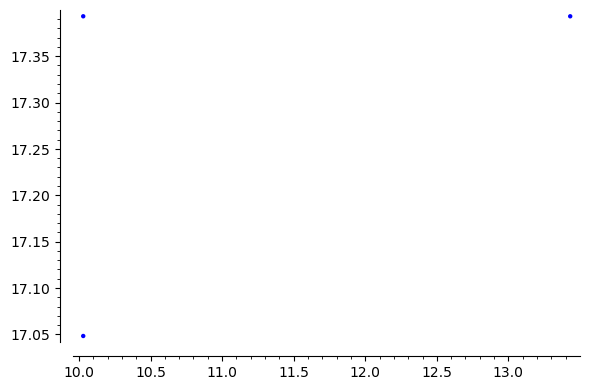

In [126]:
#naše točke za trikotnik

d = numpy.diag(kov_matrika(utezi))
avr_pov = [i * 1/len(utezi) for i in [sum(x) for x in zip(*utezi)]]

A = 0.3
#p_xl = arglexmin(x, [numpy.dot((1-A), avr_pov),numpy.dot(A, d)])
p_xl = arglexmin(x, [avr_pov, d])
print(p_xl)
najin_xl = p_xl[0][1]
#p_xr = arglexmin(x, [numpy.dot((1-A), d),numpy.dot(A, avr_pov)])
p_xr = arglexmin(x, [d, avr_pov])
najin_xr = p_xr[0][1]
print(p_xr)

prva_tocka = p_xl[0][0]
druga_tocka = [p_xl[0][0][0], p_xr[0][0][1]]
tretja_tocka = p_xr[0][0]
print(prva_tocka)
print(druga_tocka)
print(tretja_tocka)

point([prva_tocka, druga_tocka, tretja_tocka])

In [129]:
#x rob
#def argmin(seznam_xl_xr, vektorji):
#    xmin = min(([numpy.dot(numpy.array(v), numpy.array(x))  for v in vektorji], x) for x in seznam_x)
#    return (xmin, [xmin, xmin[0][0]+xmin[0][1])
#(([2.397638258326723, 3.978466909885242], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), 6.376105168211964)
                   
def argmin(seznam_xl_xr, vektorji):
    najmanjsi_x = seznam_xl_xr[0]
    skalarni_ena = numpy.dot(vektorji[0], najmanjsi_x)
    skalarni_koren = sqrt(numpy.dot(vektorji[1], najmanjsi_x))
    najmanjsi_skalarni_produkt = skalarni_ena + skalarni_koren
    for i in range(1,len(seznam_xl_xr)):
        skalarni_ena1 = numpy.dot(vektorji[0], seznam_xl_xr[i])
        skalarni_koren1 = sqrt(numpy.dot(vektorji[1], seznam_xl_xr[i]))
        skalarni_produkt1 = skalarni_ena + skalarni_koren
        if skalarni_produkt1 < najmanjsi_skalarni_produkt:
            najmanjsi_x = seznam_x[i]
            skalarni_ena = skalarni_ena1
            skalarni_koren = skalarni_koren1
            najmanjsi_skalarni_produkt = skalarni_produkt1 #najmanjsi skalarni produkt je OBJ
    vrnitev = ([skalarni_ena, skalarni_koren], najmanjsi_x, najmanjsi_skalarni_produkt)
    return(vrnitev)
                   
x_rob = argmin([najin_xl, najin_xr], [avr_pov, d])
print(x_rob)



([10.029634602417488, 4.128948821289579], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 14.158583423707068)
